# Bioinfo JM SSteyaert

## Détection de signatures sur un génome complet

In [1]:
import requests

url1 = "ftp://ftp.expasy.org/databases/prosite/prosite.dat"
url2 = "http://downloads.yeastgenome.org/sequence/S288C_reference/orf_dna/orf_coding_all.fasta.gz"

def load(url, name):
    r = requests.get(url)
    with open(name, 'wb') as handle:
        handle.write(r.content)

load(url2, "orf_coding_all.fasta.gz")

In [2]:
from Bio.ExPASy import Prosite
handle = open("myprosite.dat")
records = Prosite.parse(handle)
for record in records:
    if "p-loop" in record.description.lower():
        print(record.name)
        print(record.accession)
        print(record.pattern)

ATP_GTP_A
PS00017
[AG]-x(4)-G-K-[ST].


In [3]:
import shutil
import gzip

with gzip.open("orf_coding_all.fasta.gz", 'rb') as f_in, open("orf_coding_all.fasta", 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)

In [4]:
import os
print("Taille du fichier : {} ko".format(os.stat("orf_coding_all.fasta").st_size/1000))

Taille du fichier : 11491.336 ko


In [5]:
from Bio import SeqIO
from Bio.Seq import Seq

handle = open("orf_coding_all.fasta")
seqRec = []
for seq in SeqIO.parse(handle, "fasta"):
    seqRec.append(seq)
seqRec

[SeqRecord(seq=Seq('ATGGTACTGACGATTTATCCTGACGAACTCGTACAAATAGTGTCTGATAAAATT...TAA', SingleLetterAlphabet()), id='YAL001C', name='YAL001C', description='YAL001C TFC3 SGDID:S000000001, Chr I from 151006-147594,151166-151097, Genome Release 64-2-1, reverse complement, intron sequence removed, Verified ORF, "Subunit of RNA polymerase III transcription initiation factor complex; part of the TauB domain of TFIIIC that binds DNA at the BoxB promoter sites of tRNA and similar genes; cooperates with Tfc6p in DNA binding; largest of six subunits of the RNA polymerase III transcription initiation factor complex (TFIIIC)"', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGAGCAAAATGGCCTTGACCACGACAGCAGATCTAGCATCGATACGACTATT...TAA', SingleLetterAlphabet()), id='YAL002W', name='YAL002W', description='YAL002W VPS8 SGDID:S000000002, Chr I from 143707-147531, Genome Release 64-2-1, Verified ORF, "Membrane-binding component of the CORVET complex; involved in endosomal vesicle tethering and fusion in the endosome to va

In [6]:
seqTr = []
for seq in seqRec:   
    new_s = seq.seq.translate()
    new_seq = SeqIO.SeqRecord(new_s, id=seq.id, name=seq.name, description=seq.description, dbxrefs=seq.dbxrefs)
    seqTr.append(new_seq)

print(len(seqTr))

with open("orf_aa_all.fasta", "w") as output_handle:
        SeqIO.write(seqTr, output_handle, "fasta")

C:\Users\pepou\Anaconda3\lib\site-packages\Bio\Seq.py:2609: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


6713


In [7]:
url3 = "http://downloads.yeastgenome.org/sequence/S288C_reference/orf_protein/orf_trans_all.fasta.gz"
load(url3, "orf_trans_all.fasta.gz")

with gzip.open("orf_trans_all.fasta.gz", 'rb') as f_in, open("orf_trans_all.fasta", 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)

In [8]:
handle = open("orf_trans_all.fasta")
seqAA = []
for seq in SeqIO.parse(handle, "fasta"):
    seqAA.append(seq)
len(seqAA)

6713

In [9]:
for k in range(6713):
    if seqTr[k].seq != seqAA[k].seq:
        print(k)
        print(seqTr[k].seq, seqAA[k].seq)

6681
IYYIIFLYNILLIIILIFYSIVGVPIIIFNNNYYWDPDIFLFIIYYFIKFIIIFNLYLYYIINYIVYTPSGSPPGRGLYILLYNILYSYNIFIDYVIKFILCVLYIYLIFWLLSPTPSPYYVSEVPVS* MYYIMFLYNMLLIIILIFYSIVGVPIIIFNNNYYWDPDIFLFIIYYFIKFIIIFNLYLYYMINYIVYTPSGSPPGRGTYILLYNMLYSYNMFIDYVMKFITCVTYMYLMFWLLSPTPSPYYVSEVPVS*
6682
MCALYIFNILVIITHPLPLLRLRGPGFVRNRDLYIYKYKSNLINNLNNILYIL* MCATYMFNITVIITHPTPTLRTRGPGFVRNRDLYIYKYKSNLINNLNNMTYIL*
6683
ILIIYILFIIMKTYPILSYHIISYHIILYLII*YIKYSLYMRL*LLYKSYFIFIFIWTNNNYNNNY*YVLILINTYLYYNINIHFLLINKKFLYSL* MLMMYMLFIMMKTYPMLSYHMMSYHIMLYTIMWYMKYSTYMRLWLLYKSYFIFIFIWTNNNYNNNYWYVTMLMNTYLYYNMNIHFLTINKKFLYSL*
6684
MVQR*LYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQYLHGNSQLFNVLVVGHAVLMIFFLVMPALIGGFGNYLLPLIIGATDTAFPRINNIAF*VLPMGLVCLVTSTLVESGAGTG*TVYPPLSSIQAHSGPSVDLAIFALHLTSISSLLGAINFIVTTLNMRTNGMTMHKLPLFV*SIFITAFLLLLSLPVLSAGITMLLLDRNFNTSFFEVSGGGDPILYEHLF*FFGHPEVYILIIPGFGIISHVVSTYSKKPVFGEISMVYAMASIGLLGFLV*SHHMYIVGLDADLRAYFLSALMIIAIPTGIKIFS*LALIHGGSIRLALPMLYAIAFLFLFTMGGLTGVALANASLDVAFHDTYYVVGHFHYVLSMGAIFSLFAGYYY*SPQILGLNYNEKLAQIQF

On note étrangement des différences pour les séquences 6681 à 6708 (inclues) entre la traduction depuis la séquence ADN et la séquence protéique correspondante. Le code génétique de la mitochondrie n'est-il pas différent du code génétique universel ?

In [10]:
def transition(state, letter):
    if state == 0 and letter in "AG":
        return 1
    if state in [1, 2, 3, 4]:
        return state+1
    if state == 5 and letter == "G":
        return 6
    if state == 6 and letter == "K":
        return 7
    if state == 7 and letter in ["S", "T"]:
        return 8

def automate_search(seq):
    states = [0]
    for letter in seq:
        new_states = [0]
        for state in states:
            r = transition(state, letter)
            if r == 8:
                return True
            if r != None and not (r in new_states):
                new_states.append(r)
        states = new_states
    return False

output = open("P-loop_prot_list.txt", "w")
for seqaa in seqAA:
    if automate_search(seqaa.seq):
        output.write("{}\n".format(seqaa.id))
output.close()

In [11]:
count_p = {}
count = {}
total = 0
total_p = 0

def add(seq, dic):
    for l in seq:
        if not l in dic:
            dic[l] = 0
        dic[l] += 1

for seqaa in seqAA:
    total += len(seqaa)
    add(seqaa.seq, count)
    if automate_search(seqaa.seq):
        total_p += len(seqaa)
        add(seqaa.seq, count_p)
        
for aa in count:
    count[aa] = 100. * float(count[aa]) / total
    
for aa in count_p:
    count_p[aa] = 100. * float(count_p[aa]) / total_p
    
print(len(count_p))
    
for aa in count_p:
    print("{} ploops | ".format(aa) + "p"*int(count_p[aa]*5) + " {:.3}%".format(count_p[aa]))
    print("{} genome | ".format(aa) + "*"*int(count[aa]*5) + " {:.3}%".format(count[aa]))

21
M ploops | pppppppppp 2.04%
M genome | ********** 2.1%
V ploops | ppppppppppppppppppppppppppp 5.5%
V genome | *************************** 5.57%
L ploops | pppppppppppppppppppppppppppppppppppppppppppppp 9.25%
L genome | *********************************************** 9.56%
T ploops | ppppppppppppppppppppppppppppppp 6.33%
T genome | ***************************** 5.9%
I ploops | ppppppppppppppppppppppppppppppppp 6.72%
I genome | ******************************** 6.55%
Y ploops | pppppppppppppppp 3.34%
Y genome | **************** 3.38%
P ploops | ppppppppppppppppppppp 4.34%
P genome | ********************* 4.38%
D ploops | ppppppppppppppppppppppppppppp 5.95%
D genome | **************************** 5.75%
E ploops | ppppppppppppppppppppppppppppppppp 6.7%
E genome | ******************************** 6.42%
Q ploops | ppppppppppppppppppp 3.96%
Q genome | ******************* 3.9%
S ploops | ppppppppppppppppppppppppppppppppppppppppppp 8.74%
S genome | ********************************************

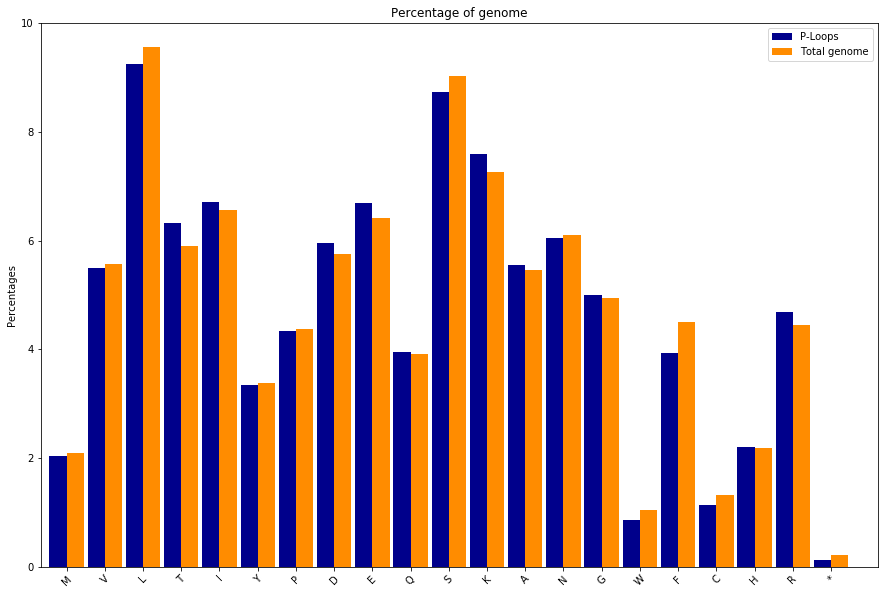

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

## the data
N = 21
aa = list(count_p.keys())
p = [count_p[a] for a in aa]
tot = [count[a] for a in aa]

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.45                      # the width of the bars

## the bars
rects1 = ax.bar(ind, p, width,
                color='darkblue')

rects2 = ax.bar(ind+width, tot, width,
                    color='darkorange')

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,10)
ax.set_ylabel('Percentages')
ax.set_title('Percentage of genome')
xTickMarks = aa
ax.set_xticks(ind+width/2)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('P-Loops', 'Total genome') )

plt.show()

In [13]:
from Bio import Restriction
plist = open("P-loop_prot_list.txt", "r")
plist = plist.read().split("\n")[:-1]
restriction_sites = {}
for seqR in seqRec:
    if seqR.id in plist:
        r_sites = [Restriction.EcoRI.search(seqR.seq)]
        r_sites= r_sites + [Restriction.XhoI.search(seqR.seq)]
        r_sites= r_sites + [Restriction.TaqI.search(seqR.seq)]
        restriction_sites[seqR.id] = r_sites

In [14]:
for seq_id in plist:
    handle = open("Restriction_PLoop/Restriction_{}.txt".format(seq_id), "w")
    r_sites = restriction_sites[seq_id]
    handle.write("EcoRI\n{}\nXhoI\n{}\nTaqI\n{}".format(r_sites[0], r_sites[1], r_sites[2]))
    handle.close()
    if [] in r_sites:
        print(seq_id)

YAL001C
YAL026C
YAL035W
YAL036C
YAL048C
YAL053W
YAR009C
YBL005W-B
YBL017C
YBL022C
YBL063W
YBL099W
YBL100W-B
YBL111C
YBR012W-B
YBR025C
YBR042C
YBR058C-A
YBR080C
YBR118W
YBR121C
YBR142W
YBR162W-A
YBR164C
YBR179C
YBR186W
YBR208C
YBR227C
YBR242W
YBR264C
YBR270C
YCL004W
YCL019W
YCL024W
YCL027W
YCR002C
YCR011C
YCR027C
YCR073W-A
YCR085W
YCR092C
YCR106W
YDL007W
YDL031W
YDL084W
YDL100C
YDL126C
YDL137W
YDL154W
YDL160C
YDL166C
YDL185W
YDL192W
YDL223C
YDL225W
YDR004W
YDR011W
YDR021W
YDR034C-D
YDR061W
YDR076W
YDR091C
YDR097C
YDR098C-B
YDR127W
YDR135C
YDR155C
YDR172W
YDR190C
YDR194C
YDR196C
YDR207C
YDR210C-D
YDR210W-B
YDR217C
YDR218C
YDR243C
YDR248C
YDR261W-B
YDR291W
YDR292C
YDR316W-B
YDR336W
YDR365W-B
YDR375C
YDR385W
YDR394W
YDR421W
YDR430C
YDR454C
YDR506C
YDR534C
YEL045C
YER006W
YER017C
YER019W
YER020W
YER025W
YER031C
YER036C
YER047C
YER095W
YER114C
YER132C
YER138C
YER139C
YER151C
YER160C
YER165W
YER166W
YER172C
YER179W
YFL002W-A
YFL003C
YFL005W
YFL008W
YFL028C
YFL038C
YFL066C
YFR007W
YFR009W
YFR0

## 2 - Analyse de séquence et structure 3D

In [15]:
from Bio.PDB import *
pdbl=PDBList() 
structure_id = "2gaa" 
pdbl.retrieve_pdb_file(structure_id) 
parser =  MMCIFParser()

filename = "ga/2gaa.cif" 
structure = parser.get_structure(structure_id, filename)
structure

Structure exists: 'C:\Users\pepou\Documents\Travail\BIOINFO\ga\2gaa.cif' 


<Structure id=2gaa>

In [16]:
structure.header

{}

In [17]:
from Bio.PDB.MMCIF2Dict import MMCIF2Dict
mmcif_dict = MMCIF2Dict(filename)
print("Nombre d'atomes: ", len(mmcif_dict["_atom_site.Cartn_x"]))
print("Nombre de chaînes : ", sum([int(x) for x in mmcif_dict['_struct_sheet.number_strands']]))
print("Nombre de résidus : ", mmcif_dict['_struct_site.pdbx_num_residues'])
print("Méthode de résolution : ", mmcif_dict['_exptl.method'])

Nombre d'atomes:  2810
Nombre de chaînes :  13
Nombre de résidus :  9
Méthode de résolution :  X-RAY DIFFRACTION


In [18]:
page = requests.get("http://www.ebi.ac.uk/pdbe/entry/pdb/2gaa")
text = page.text
uniprot = "/pdbe/entry/search/index?uniprot_accession:"
pos = text.find(uniprot)
code = text[pos+len(uniprot):].split('"')[0]
code

'P43591'

In [19]:
from Bio import ExPASy
def request(entry):
    with ExPASy.get_sprot_raw(entry) as handle:
        seq_record = SeqIO.read(handle, "swiss")
    return seq_record
seqSwiss = request(code)
seqSwiss

SeqRecord(seq=Seq('MVDTHKLADDVLQLLDNRIEDNYRVCVILVGSPGSGKSTIAEELCQIINEKYHT...RND', ProteinAlphabet()), id='P43591', name='YFH7_YEAST', description='RecName: Full=ATP-dependent kinase YFH7; EC=2.7.1.-; AltName: Full=Altered inheritance of mitochondria protein 12;', dbxrefs=['EMBL:D50617', 'EMBL:AY558494', 'EMBL:BK006940', 'PIR:S56262', 'RefSeq:NP_116662.1', 'PDB:2GA8', 'PDB:2GAA', 'PDBsum:2GA8', 'PDBsum:2GAA', 'ProteinModelPortal:P43591', 'SMR:P43591', 'BioGrid:31156', 'DIP:DIP-5443N', 'IntAct:P43591', 'STRING:4932.YFR007W', 'MaxQB:P43591', 'PaxDb:P43591', 'PRIDE:P43591', 'EnsemblFungi:YFR007W_mRNA', 'GeneID:850558', 'KEGG:sce:YFR007W', 'EuPathDB:FungiDB:YFR007W', 'SGD:S000001903', 'HOGENOM:HOG000141840', 'InParanoid:P43591', 'OMA:LYDQENW', 'BioCyc:YEAST:G3O-30460-MONOMER', 'EvolutionaryTrace:P43591', 'PRO:PR:P43591', 'Proteomes:UP000002311', 'GO:GO:0005524', 'GO:GO:0016887', 'GO:GO:0016301', 'GO:GO:0016310', 'InterPro:IPR011704', 'InterPro:IPR027417', 'Pfam:PF07728', 'SUPFAM:SSF52540'])

In [20]:
pdb_struct = [x[4:] for x in seqSwiss.dbxrefs if 'PDB:' in x] 
print("Nombre de structures existantes sur PDB : ", len(pdb_struct))
print("Codes correspondants : ", pdb_struct)

Nombre de structures existantes sur PDB :  2
Codes correspondants :  ['2GA8', '2GAA']


In [21]:
from Bio.Blast import NCBIWWW
result_handle = NCBIWWW.qblast("blastp", "nr", code)

In [22]:
save_file = open("blast_2gaa.xml", "w") #Sauvegarde
save_file.write(result_handle.read())
save_file.close()
result_handle.close() 

In [24]:
from Bio.Blast import NCBIXML
handle = open("blast_2gaa.xml")
blast_record = NCBIXML.read(handle)
print(len(blast_record.alignments))

50


In [25]:
plist = open("P-loop_prot_list.txt", "r")
plist = plist.read().split("\n")[:-1]
print(len(plist))

441


In [77]:
for k in range(len(blast_record.alignments)):
    a = blast_record.alignments[k].title.split("gi|")[1:]
    for name in a:
        b = name.split("|")[-1].split("[")[0]
        if not blast_record.alignments[k].hsps[0].expect < 0.1e-120:
            print(b, blast_record.alignments[k].hsps[0], blast_record.alignments[k])

 hypothetical protein Kpol_467p9  Score 916 (357 bits), expectation 6.8e-119, alignment length 363
Query:       1 MVDTHKLADDVLQLLDNRIEDNYRVCVILVGSPGSGKSTIAEELC...RND 353
               M D   L  D L+LL +R++ NYR+ +++VG PGSGKSTIA ELC... ND
Sbjct:       1 MFDIDGLVSDSLKLLADRVDKNYRISLVIVGPPGSGKSTIANELC...HND 359 gi|156839326|ref|XP_001643355.1| hypothetical protein Kpol_467p9 [Vanderwaltozyma polyspora DSM 70294] >gi|322967606|sp|A7TQF3.1|YFH7_VANPO RecName: Full=ATP-dependent kinase YFH7 >gi|156113962|gb|EDO15497.1| hypothetical protein Kpol_467p9 [Vanderwaltozyma polyspora DSM 70294]
           Length = 359

YFH7_VANPO RecName: Full=ATP-dependent kinase YFH7 > Score 916 (357 bits), expectation 6.8e-119, alignment length 363
Query:       1 MVDTHKLADDVLQLLDNRIEDNYRVCVILVGSPGSGKSTIAEELC...RND 353
               M D   L  D L+LL +R++ NYR+ +++VG PGSGKSTIA ELC... ND
Sbjct:       1 MFDIDGLVSDSLKLLADRVDKNYRISLVIVGPPGSGKSTIANELC...HND 359 gi|156839326|ref|XP_001643355.1| hypothetical protein Kpol_46

Il semblerait que beaucoup de structures soient en réalité une seule et même protéine : la YFH7p, de code YFR007W, qui est notre protéine de départ. Les protéines similaires sont pour la plupart "uncharacterized" ou "hypothetical", dans l'ensemble c'est compliqué de distinguer si elles proviennent de levures.

http://www.ebi.ac.uk/msd-srv/ssm/cgi-bin/ssmserver